<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_data = pd.read_csv('/content/customer_support_tickets.csv')
customer_data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [21]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [17]:
customer_data.shape

(8469, 17)

In [20]:
customer_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Ticket ID  Customer Name  Customer Email  Customer Age  Customer Gender  \
0         False          False           False         False            False   
1         False          False           False         False            False   
2         False          False           False         False            False   
3         False          False           False         False            False   
4         False          False           False         False            False   
...         ...            ...             ...           ...              ...   
8464      False          False           False         False            False   
8465      False          False           False         False            False   
8466      False          False           False         False            False   
8467      False          False           False         False            False   
8468      False          False           False 

Segregating customer's age into different groups using binning

In [8]:
customer_data = {'Customer Age': [22,28,31,37,42,47,53,60] }
df = pd.DataFrame(customer_data)

In [10]:
bin_edges = [18,25,35,40,45,50,100]

Bin labels


In [12]:
bin_labels = ['18-25','25-35','35-40','40-45','45-50','50+']

In [13]:
df['age_group'] = pd.cut(df['Customer Age'], bins=bin_edges, labels=bin_labels, right=False)

In [14]:
print(df)

   Customer Age age_group
0            22     18-25
1            28     25-35
2            31     25-35
3            37     35-40
4            42     40-45
5            47     45-50
6            53       50+
7            60       50+


Using barplot displaying the distribution of customers across different age groups

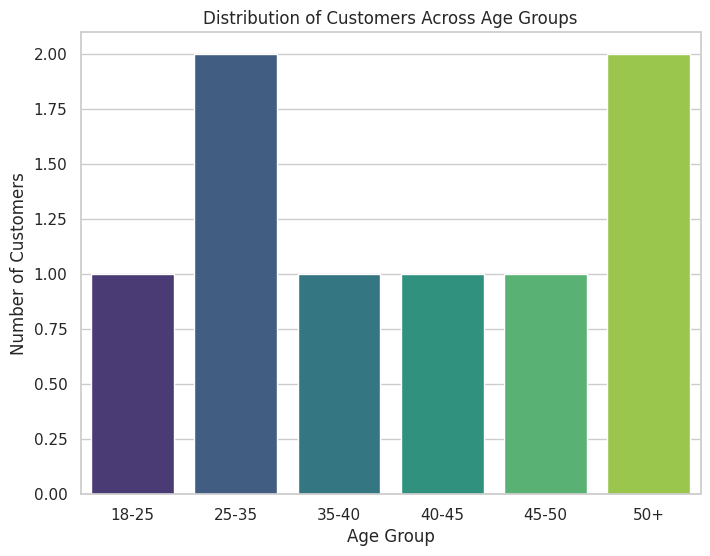

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df, order=bin_labels, palette="viridis")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers Across Age Groups")
plt.show()

Converting categorical variables to numerical variables using labelencoder

---



In [24]:
from sklearn.preprocessing import LabelEncoder

customer_data = {'Customer Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Ticket Status': ['Open', 'Closed', 'Open', 'Pending', 'Closed']}
df = pd.DataFrame(customer_data)
label_encoder_gender = LabelEncoder()
label_encoder_status = LabelEncoder()
df['gender_encoded'] = label_encoder_gender.fit_transform(df['Customer Gender'])
df['ticket_status_encoded'] = label_encoder_status.fit_transform(df['Ticket Status'])

In [28]:
df.head()

,Customer Gender,Ticket Status,gender_encoded,ticket_status_encoded
0,Male,Open,1,1
1,Female,Closed,0,0
2,Male,Open,1,1
3,Female,Pending,0,2
4,Male,Closed,1,0


Finding the relationship between numerical variables age,product rating using covariance matrix

There is null values in satisfaction rating

<ipython-input-42-f28801ed9ea9>:7: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov()


Covariance Matrix:
                       age  product_rating
age             168.571429        0.557143
product_rating    0.557143        0.198393


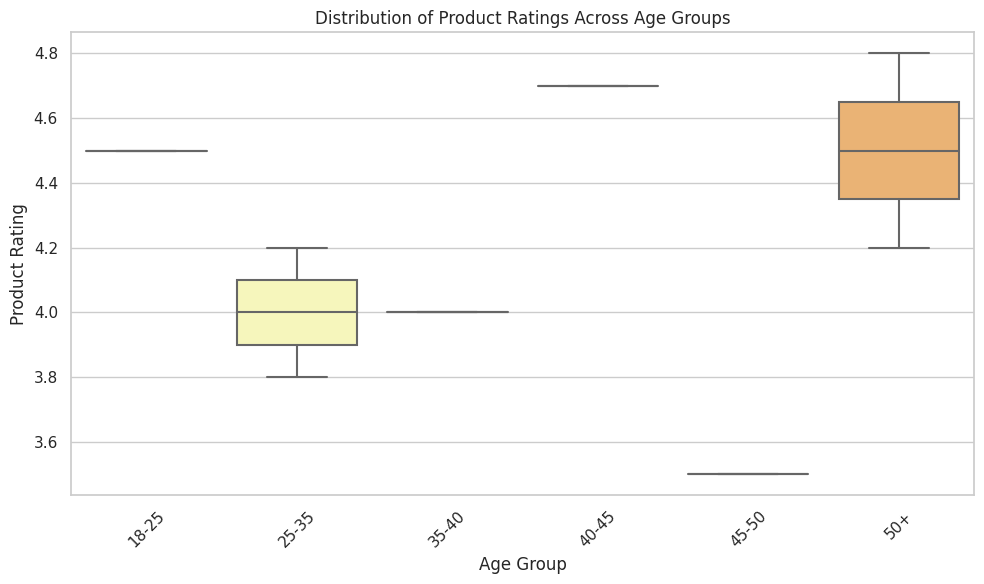

In [42]:
customer_data = {'age': [22, 28, 31, 37, 42, 47, 53, 60],
        'product_rating': [4.5, 3.8, 4.2, 4.0, 4.7, 3.5, 4.8, 4.2],
          'age_group': ['18-25', '25-35', '25-35', '35-40', '40-45', '45-50', '50+', '50+']}
df = pd.DataFrame(customer_data)


covariance_matrix = df.cov()

print("Covariance Matrix:")
print(covariance_matrix)

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='product_rating', data=df, palette="Set3")
plt.xlabel("Age Group")
plt.ylabel("Product Rating")
plt.title("Distribution of Product Ratings Across Age Groups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()